In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Загрузка изображения

In [8]:
image = cv2.imread('sar_1.jpg')

# Зашумить изображение

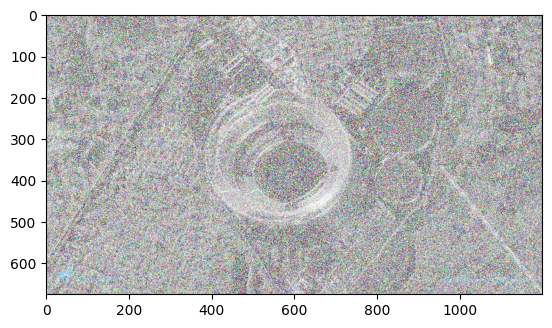

In [9]:
def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape).astype('uint8')
    noisy_image = cv2.add(image, gauss)
    return noisy_image

noisy_image = add_gaussian_noise(image)
plt.imshow(noisy_image, cmap="gray")

# Протестировать фильтры (М/Г/Б/Н)

In [10]:
median_filtered = cv2.medianBlur(noisy_image, 5)
gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 0)
bilateral_filtered = cv2.bilateralFilter(noisy_image, 9, 75, 75)
nlm_filtered = cv2.fastNlMeansDenoisingColored(noisy_image, None, 10, 10, 21)

# Какой фильтр показал лучший результат

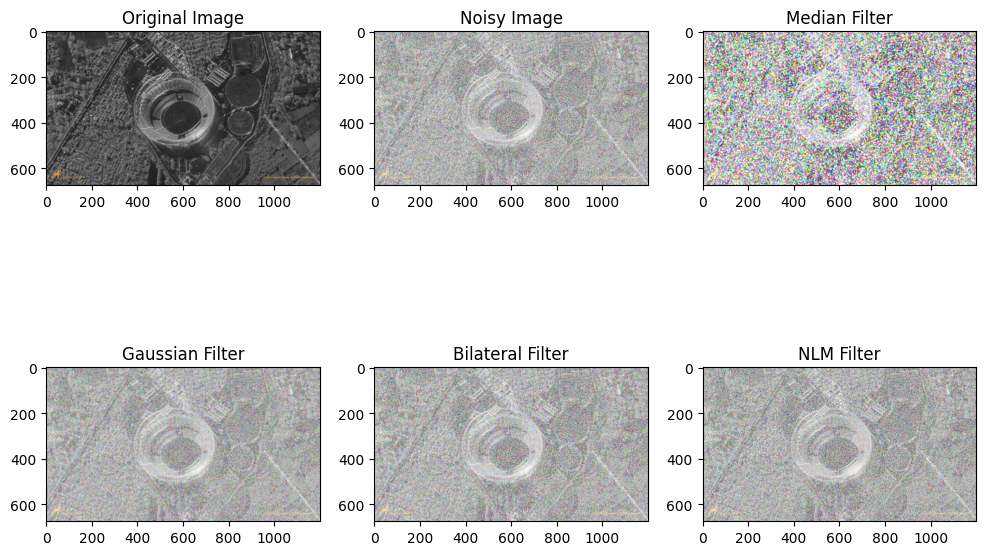

PSNR values:
Median Filter: 6.283275612018196
Gaussian Filter: 8.182800764744014
Bilateral Filter: 6.452332411848472
NLM Filter: 6.192943398153234


In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)), plt.title('Noisy Image')
plt.subplot(2, 3, 3), plt.imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB)), plt.title('Median Filter')
plt.subplot(2, 3, 4), plt.imshow(cv2.cvtColor(gaussian_filtered, cv2.COLOR_BGR2RGB)), plt.title('Gaussian Filter')
plt.subplot(2, 3, 5), plt.imshow(cv2.cvtColor(bilateral_filtered, cv2.COLOR_BGR2RGB)), plt.title('Bilateral Filter')
plt.subplot(2, 3, 6), plt.imshow(cv2.cvtColor(nlm_filtered, cv2.COLOR_BGR2RGB)), plt.title('NLM Filter')
plt.show()

def calculate_psnr(original, processed):
    return cv2.PSNR(original, processed)

psnr_median = calculate_psnr(image, median_filtered)
psnr_gaussian = calculate_psnr(image, gaussian_filtered)
psnr_bilateral = calculate_psnr(image, bilateral_filtered)
psnr_nlm = calculate_psnr(image, nlm_filtered)

print("PSNR values:")
print(f"Median Filter: {psnr_median}")
print(f"Gaussian Filter: {psnr_gaussian}")
print(f"Bilateral Filter: {psnr_bilateral}")
print(f"NLM Filter: {psnr_nlm}")